# 1.Importamos librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 2.Importamos datos y echamos un vistazo. En este caso vale la pena hacer un scatter de longitud, latitud

In [9]:
# Leer los datos del archivo csv
df = pd.read_csv("housing.csv")

# Visualizar las primeras filas del conjunto de datos
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='longitude', ylabel='latitude'>

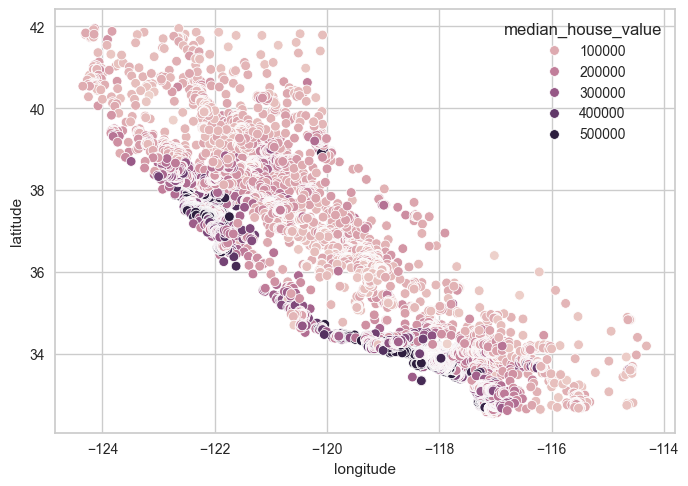

In [12]:
# Crea un gráfico de dispersión usando la función scatterplot de seaborn
# Establece la fuente de datos como 'data' DataFrame
# Especifica 'longitud' como el eje x, 'latitud' como el eje y, y 'valor_medio_casa' como el matiz
sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'median_house_value')

# 3.Preprocesado

In [13]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
df.drop(columns=['total_bedrooms'],inplace=True)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [15]:
# Transformación a numérica, en este caso one-hot
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [17]:
# Tu código
# Creamos el objeto que realizará la transformación

#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df[["ocean_proximity"]])
a=onehot.transform(df[["ocean_proximity"]])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(["ocean_proximity"]))

# Reseteo el índice de los dos data frames antes de concatenarlos
df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df=pd.concat([df,encoded_df],axis=1)

# Elimino la columna Job original antigua, la categórica
df.drop(columns=["ocean_proximity"],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df.shape)
df.sample(5)

(20640, 13)


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
698,-122.11,37.69,42.0,1472.0,768.0,309.0,3.4643,160900.0,0.0,0.0,0.0,1.0,0.0
13730,-117.18,34.04,41.0,1766.0,753.0,278.0,4.9125,140700.0,0.0,1.0,0.0,0.0,0.0
12912,-121.32,38.62,29.0,2430.0,1087.0,394.0,3.0864,177900.0,0.0,1.0,0.0,0.0,0.0
13451,-117.41,34.09,21.0,3300.0,1896.0,572.0,3.6466,130600.0,0.0,1.0,0.0,0.0,0.0
16607,-120.63,35.59,9.0,5782.0,3026.0,1130.0,2.6528,113500.0,1.0,0.0,0.0,0.0,0.0


In [25]:
# Escalamos todo el data frame
standard = StandardScaler()

# Aplico el escalamiento a la columna 'total_rooms'

df_std = standard.fit_transform(df)

# Creo un data frame con los datos escalados

pd.DataFrame(df_std)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.327835,1.052548,0.982143,-0.804819,-0.974429,-0.977033,2.344766,2.129631,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
1,-1.322844,1.043185,-0.607019,2.045890,0.861439,1.669961,2.332238,1.314156,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
2,-1.332827,1.038503,1.856182,-0.535746,-0.820777,-0.843637,1.782699,1.258693,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
3,-1.337818,1.038503,1.856182,-0.624215,-0.766028,-0.733781,0.932968,1.165100,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
4,-1.337818,1.038503,1.856182,-0.462404,-0.759847,-0.629157,-0.012881,1.172900,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.512592,-0.443449,-1.216128,-1.115804,-0.891156,1.466514,-0.015566,-0.353264,-0.384466
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.944405,-1.008420,-0.691593,-1.124470,-0.891156,1.466514,-0.015566,-0.353264,-0.384466
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.369537,-0.174042,-1.142593,-0.992746,-0.891156,1.466514,-0.015566,-0.353264,-0.384466
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.604429,-0.393753,-1.054583,-1.058608,-0.891156,1.466514,-0.015566,-0.353264,-0.384466


# 4.Crear el modelo y los grupos

In [41]:
# Creamos el modelo
numero_grupos = 5
model = KMeans(n_clusters= numero_grupos, random_state = 42)

# Aplico el modelo a la columna 'total_rooms'

grupos = model.fit_predict(df_std)

# Asigno el número de grupo a cada fila

df['cluster'] = model.labels_

# 5.Asignar el número de grupo a cada fila

In [109]:
# Agregar la columna de clusters al DataFrame original


# 6.Dibujar los datos según dos variables que seleccionemos añadiendo el grupo (cluster) en el color

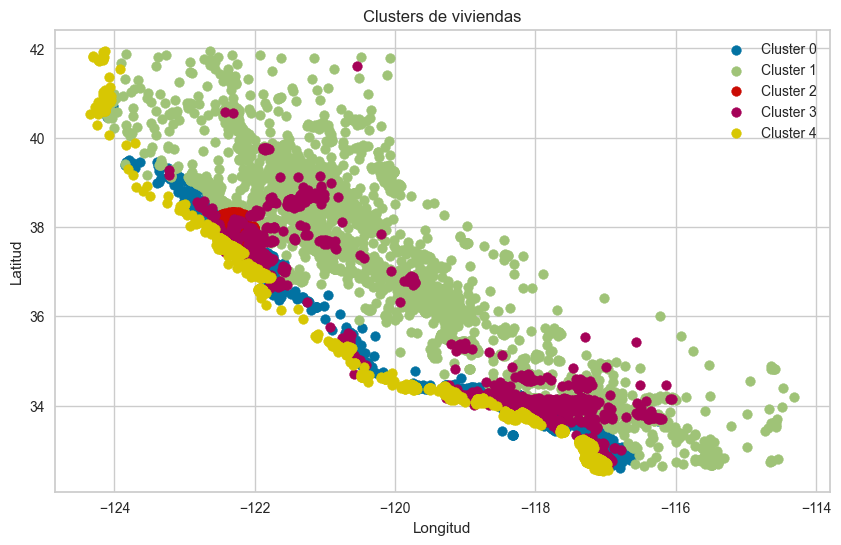

In [42]:
plt.figure(figsize=(10, 6))
for cluster in range(numero_grupos):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster}')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.title('Clusters de viviendas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

# 7.Obtener el número óptimo de grupos

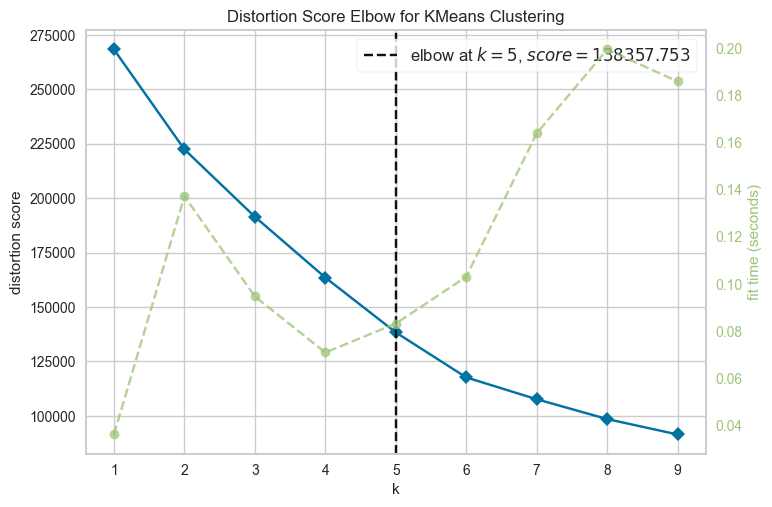

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
# Obtención del número óptimo de clústers
# librería yellowbrick que proporciona herramientas visuales para la selección de modelos, incluido el método de Elbow.

# Utiliza la visualización de codo para encontrar el número óptimo de clusters. Usar n_init=10
model = KMeans(n_init = 10)
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(df_std)
visualizer.show()

# 8.Modelo final (agrupación final). En este caso 5 grupos

In [44]:
numero_grupos = 5
model = KMeans(n_clusters= numero_grupos, random_state = 42)

# Aplico el modelo a la columna 'total_rooms'

grupos = model.fit_predict(df_std)
df['grupos_5'] = grupos

In [47]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,cluster,grupos_5
1716,-122.32,37.99,24.0,4865.0,2315.0,893.0,4.2852,173500.0,0.0,0.0,0.0,1.0,0.0,2,2
12150,-117.19,33.70,24.0,5783.0,1990.0,1151.0,1.9014,83500.0,1.0,0.0,0.0,0.0,0.0,0,0
16333,-121.33,38.03,19.0,1708.0,906.0,288.0,4.9180,130600.0,0.0,1.0,0.0,0.0,0.0,1,1
2388,-119.57,37.02,16.0,4199.0,2140.0,722.0,3.3320,111800.0,0.0,1.0,0.0,0.0,0.0,1,1
5761,-118.29,34.18,10.0,4292.0,2719.0,987.0,3.6974,286600.0,1.0,0.0,0.0,0.0,0.0,0,0


In [48]:
df['grupos_5'].value_counts()

grupos_5
0    8575
1    6112
4    2588
2    2232
3    1133
Name: count, dtype: int64

# 9.Interpretación de los grupos

In [52]:
# Realizar la media por cada cluster de todas las variables
df.groupby(['grupos_5']).mean()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,cluster
grupos_5,,,,,,,,,,,,,,
0,-118.814334,34.523570,30.173411,2250.463557,1326.575510,446.884198,4.232762,241067.722216,0.994869,0.004548,0.000583,0.000000,0.000000,0.0
1,-119.831760,36.844913,25.077552,2234.736093,1163.551211,400.007363,3.121126,120341.509326,0.007363,0.992637,0.000000,0.000000,0.000000,1.0
2,-122.262070,37.800228,38.256720,2301.934140,1136.958781,453.886201,4.151228,259413.840502,0.000000,0.000000,0.000000,1.000000,0.000000,2.0
3,-119.091492,35.226081,14.861430,8981.838482,4554.883495,1602.683142,4.377872,216627.309797,0.494263,0.392763,0.000000,0.051192,0.061783,3.0
4,-119.340985,34.746770,29.706723,2369.156878,1250.562210,465.497682,3.977094,248211.207110,0.000000,0.000000,0.000000,0.000000,1.000000,4.0
